In [239]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Read the CSV file
df = pd.read_csv('Data/Covid Data.csv')

# Print the first 10 rows of the DataFrame
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [240]:
# Print the last 10 rows of the DataFrame
print(df.shape)

(1048575, 21)


In [241]:
# Print the data type of each column
print(df.columns)

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')


In [242]:
# Print the summary statistics of the DataFrame
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


# Handling Missing Values

In [243]:
# show the num of 97/99 in each column
missing_data = df[df.isin([97, 99])].sum()
print(missing_data)

USMER                          0.0
MEDICAL_UNIT                   0.0
SEX                            0.0
PATIENT_TYPE                   0.0
DATE_DIED                        0
INTUBED                 83033943.0
PNEUMONIA                1584297.0
AGE                        21609.0
PREGNANT                50780567.0
DIABETES                       0.0
COPD                           0.0
ASTHMA                         0.0
INMSUPR                        0.0
HIPERTENSION                   0.0
OTHER_DISEASE                  0.0
CARDIOVASCULAR                 0.0
OBESITY                        0.0
RENAL_CHRONIC                  0.0
TOBACCO                        0.0
CLASIFFICATION_FINAL           0.0
ICU                     83050080.0
dtype: object


Since the missing data for INTUBED and ICU is too much, we just drop these two features.



In [244]:
# drop ICU and INTUBED
df = df.drop(columns=['INTUBED', 'ICU'])

Male cannot pregnant for sure, so we will fill in the missing data for male with 2 (no)

In [245]:
# Replace '97', '98', '99' with NaN except for age column
df.loc[:, df.columns != 'AGE'] = df.loc[:, df.columns != 'AGE'].replace([97, 98, 99], np.nan)

# For pregnant column, replace NaN with 2 if sex == 2 (male)
df.loc[(df['SEX'] == 2) & (df['PREGNANT'].isna()), 'PREGNANT'] = 2

# For age column, replace NaN with median age
df.loc[df['AGE'].isna(), 'AGE'] = df['AGE'].median()

# For date_died column, change to 1 if date_died == 9999-99-99, 0 otherwise
df.loc[df['DATE_DIED'] == '9999-99-99', 'DATE_DIED'] = 0
df.loc[df['DATE_DIED'] != 0, 'DATE_DIED'] = 1

# Impute missing values with mode
df = df.fillna(df.mode().iloc[0])

# For USMER SEX PATIENT_TYPE DATE_DIED INTUBED PNEUMONIA PREGNANT DIABETES COPD ASTHMA INMSUPR HIPERTENSION OTHER_DISEASE OBESITY RENAL_CHRONIC TOBACCO ICU columns, replace 2 with 0
columns_to_replace = ['USMER', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CARDIOVASCULAR']
df[columns_to_replace] = df[columns_to_replace].replace(2, 0)


In [246]:
# show if there is NaN in df:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
dtype: int64

Feature Engineering:

In [247]:
# Adding an AGE_GROUP column based on age 
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[-1, 20, 40, 60, 130], 
                         labels=[1, 2, 3, 4])

# convert AGE_GROUP to int
df['AGE_GROUP'] = df['AGE_GROUP'].astype(int)


# Adding a RISK_SCORE column based on (age_group + 1)/ (age_group max + 1) + disease
df['RISK_SCORE']= df['DIABETES'] + df['COPD'] + df['ASTHMA'] + df['INMSUPR'] + df['HIPERTENSION'] + df['OTHER_DISEASE'] + df['OBESITY'] + df['RENAL_CHRONIC'] + df['TOBACCO'] + df['CARDIOVASCULAR']

array([[<Axes: title={'center': 'USMER'}>,
        <Axes: title={'center': 'MEDICAL_UNIT'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'PATIENT_TYPE'}>,
        <Axes: title={'center': 'DATE_DIED'}>],
       [<Axes: title={'center': 'PNEUMONIA'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'PREGNANT'}>,
        <Axes: title={'center': 'DIABETES'}>,
        <Axes: title={'center': 'COPD'}>],
       [<Axes: title={'center': 'ASTHMA'}>,
        <Axes: title={'center': 'INMSUPR'}>,
        <Axes: title={'center': 'HIPERTENSION'}>,
        <Axes: title={'center': 'OTHER_DISEASE'}>,
        <Axes: title={'center': 'CARDIOVASCULAR'}>],
       [<Axes: title={'center': 'OBESITY'}>,
        <Axes: title={'center': 'RENAL_CHRONIC'}>,
        <Axes: title={'center': 'TOBACCO'}>,
        <Axes: title={'center': 'CLASIFFICATION_FINAL'}>,
        <Axes: title={'center': 'AGE_GROUP'}>],
       [<Axes: title={'center': 'RISK_SCORE'}>, <Axes: 

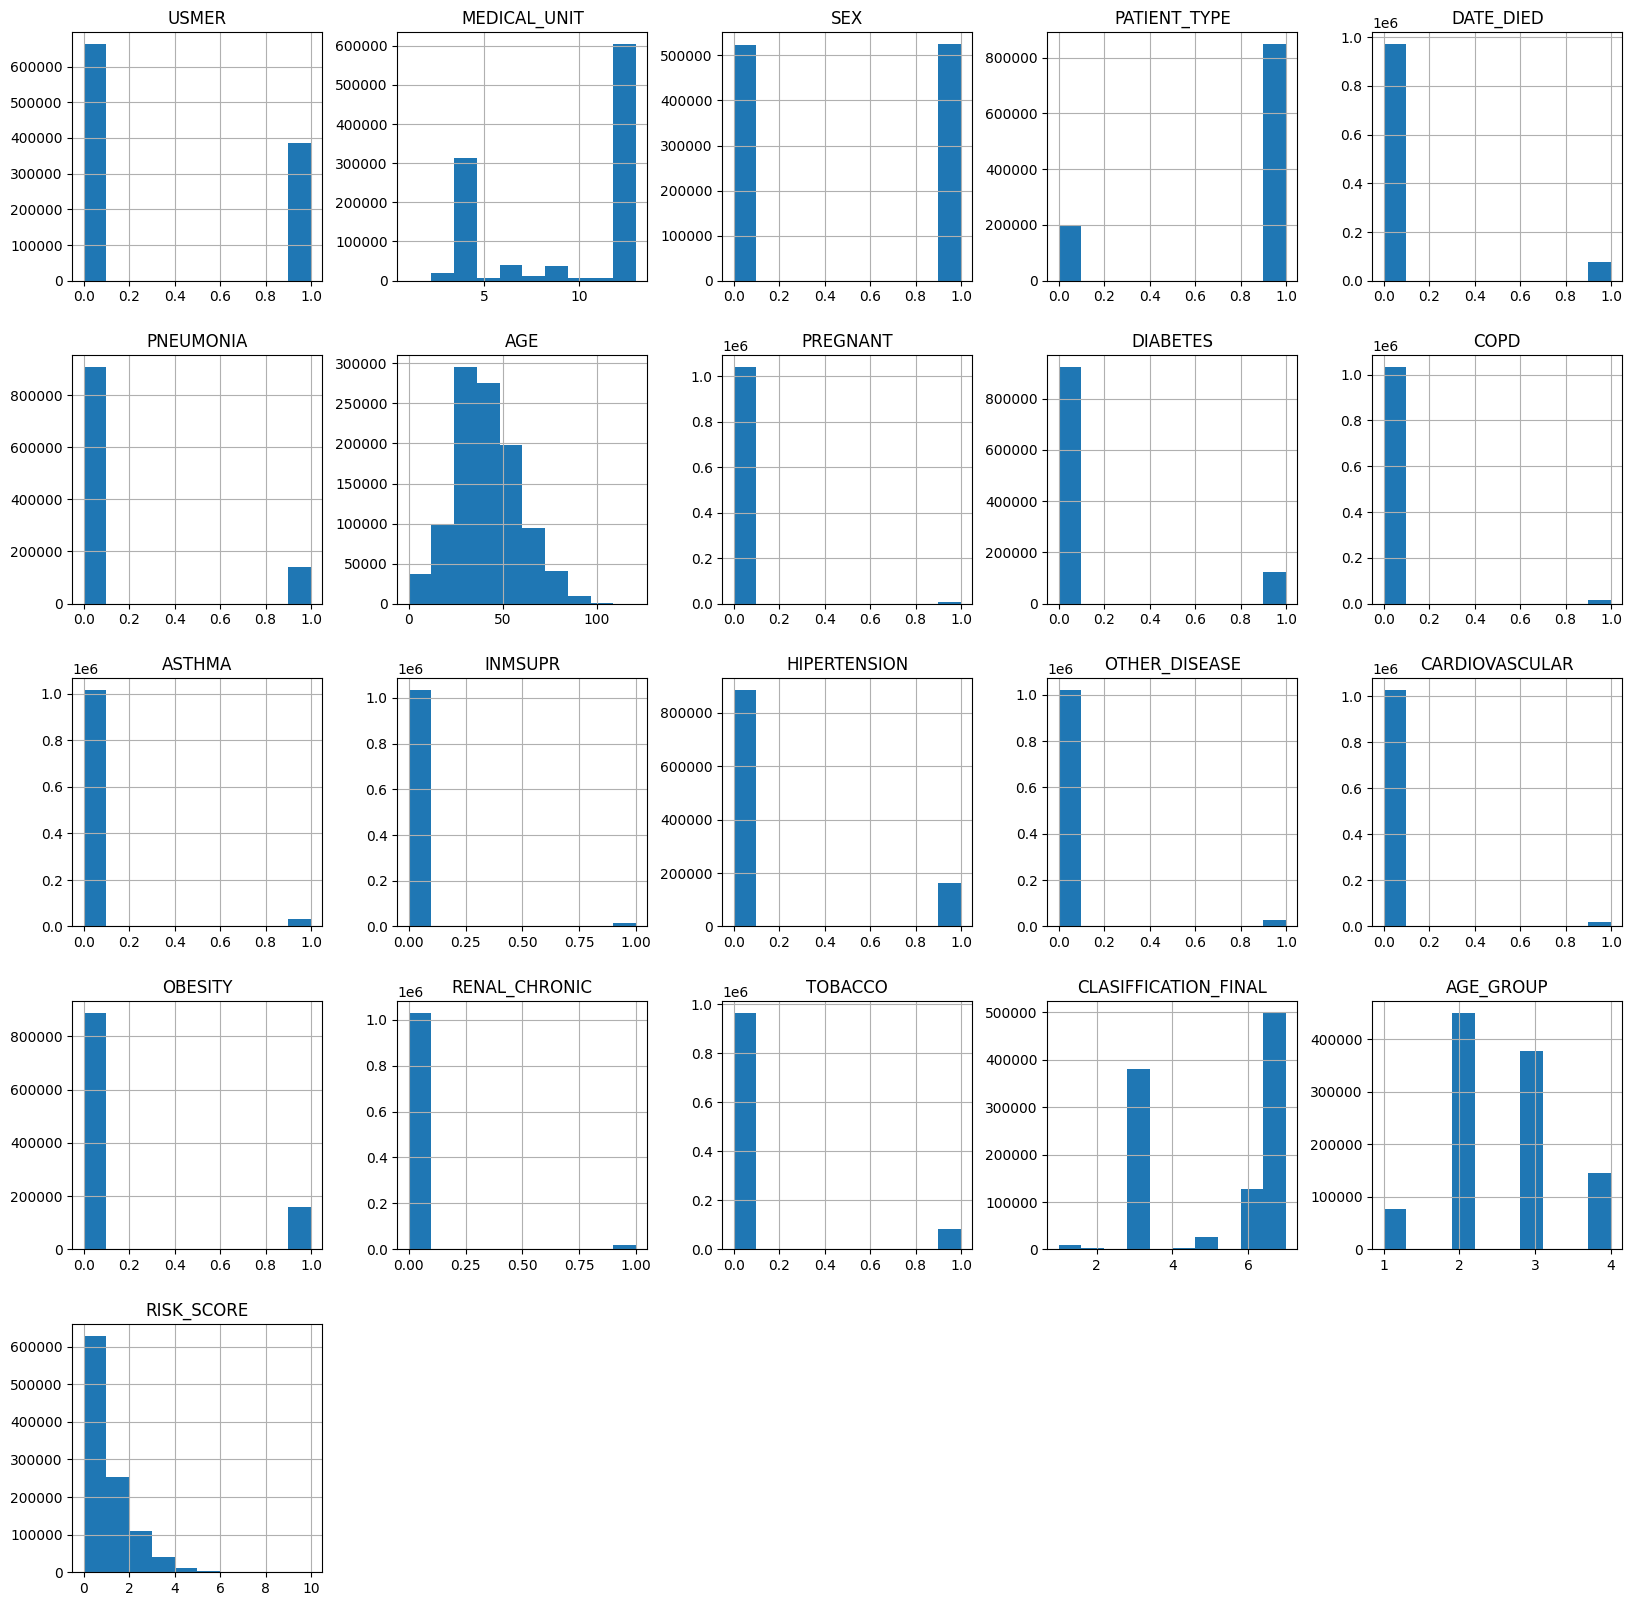

In [248]:
# Distribution Analysis

df.hist(figsize=(20, 20))

array([[<Axes: title={'center': 'USMER'}>,
        <Axes: title={'center': 'MEDICAL_UNIT'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'PATIENT_TYPE'}>,
        <Axes: title={'center': 'DATE_DIED'}>],
       [<Axes: title={'center': 'PNEUMONIA'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'PREGNANT'}>,
        <Axes: title={'center': 'DIABETES'}>,
        <Axes: title={'center': 'COPD'}>],
       [<Axes: title={'center': 'ASTHMA'}>,
        <Axes: title={'center': 'INMSUPR'}>,
        <Axes: title={'center': 'HIPERTENSION'}>,
        <Axes: title={'center': 'OTHER_DISEASE'}>,
        <Axes: title={'center': 'CARDIOVASCULAR'}>],
       [<Axes: title={'center': 'OBESITY'}>,
        <Axes: title={'center': 'RENAL_CHRONIC'}>,
        <Axes: title={'center': 'TOBACCO'}>,
        <Axes: title={'center': 'CLASIFFICATION_FINAL'}>,
        <Axes: title={'center': 'AGE_GROUP'}>],
       [<Axes: title={'center': 'RISK_SCORE'}>, <Axes: 

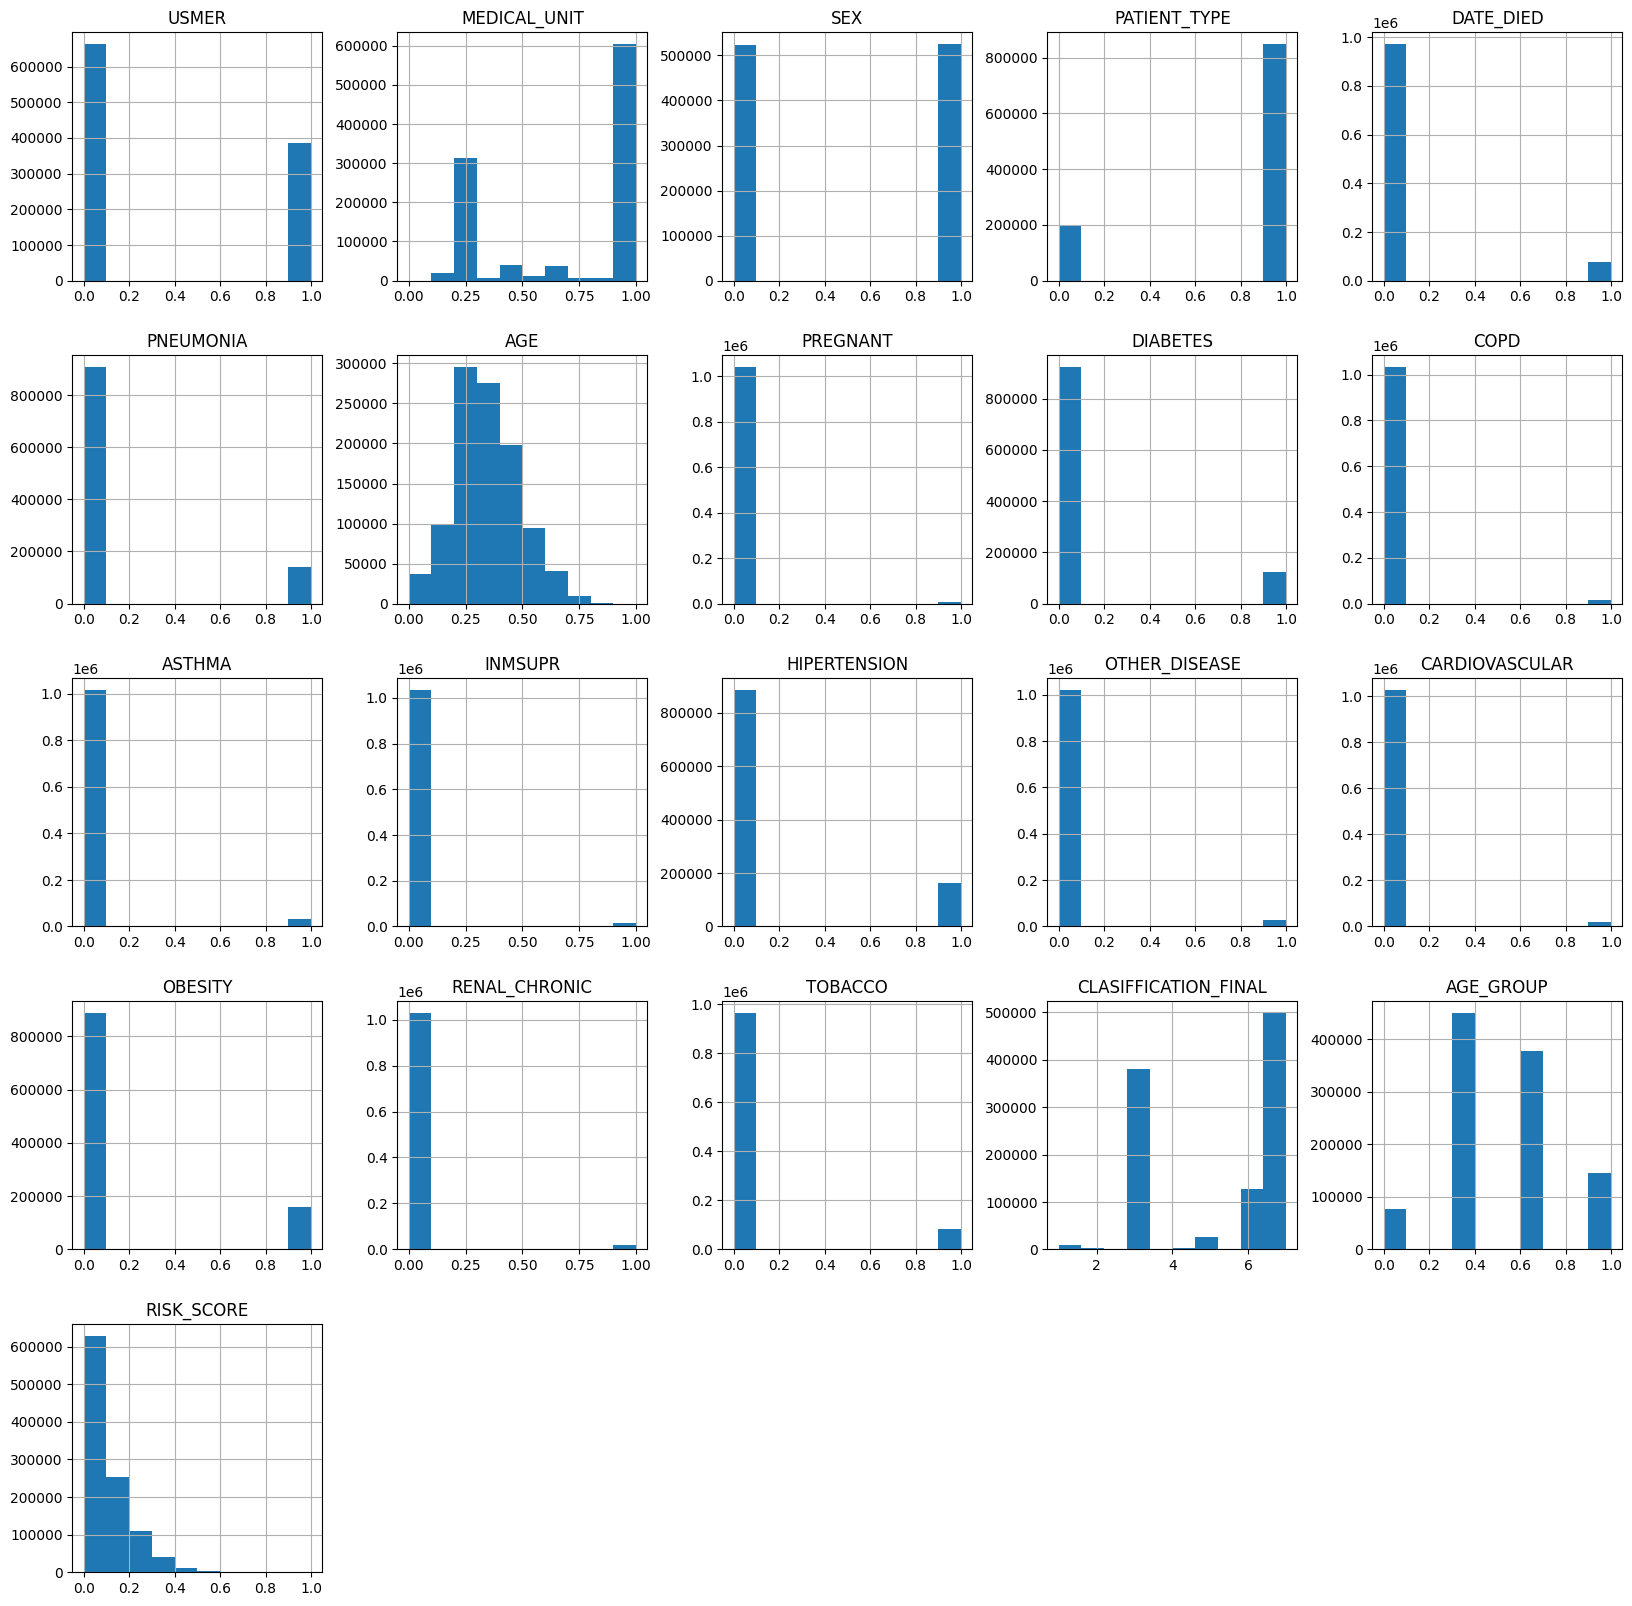

In [249]:
# Normalization
scaler = MinMaxScaler()

# Normalization for columns MEDICAL_UNIT, AGE, RISK_SCORE， AGE_GROUP
numerical_cols = ['MEDICAL_UNIT', 'AGE', 'RISK_SCORE', 'AGE_GROUP']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.hist(figsize=(20, 20))

In [250]:
# Before PCA:

# export the cleaned data and classification_final to csv
df_output = df['CLASIFFICATION_FINAL']
df_output.to_csv('Data/covid_y.csv', index=False)

df = df.drop(columns=["CLASIFFICATION_FINAL"])
df.to_csv('Data/covid_x.csv', index=False)

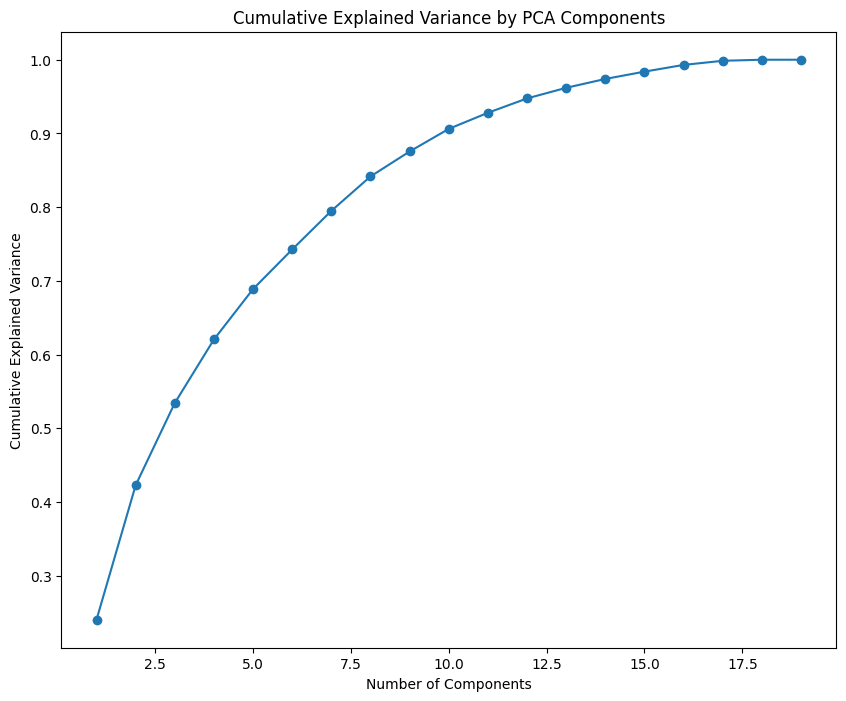

In [252]:
from sklearn.decomposition import PCA


# PCA
pca = PCA()

# move AGE, AGE_GROUP, RISK_SCORE to index 4, 5, 6
df_features = df[['AGE', 'AGE_GROUP', 'SEX', 'RISK_SCORE', 'MEDICAL_UNIT', 'PATIENT_TYPE', 'DATE_DIED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CARDIOVASCULAR']]

pca.fit(df_features)
cumulative_variance = pca.explained_variance_ratio_.cumsum() 

# Plot the explained variance ratio
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

From the PCA diagram, we can see we need 13 components to achieve > 95%

In [253]:
pca = PCA(n_components=13)
pca.fit(df_features)

reduced_X = pca.transform(df_features)


# convert to dataframe
df_pca = pd.DataFrame(reduced_X)


# output to csv
df_pca.to_csv('Data/pca_coivd_x.csv', index=False)
